# Import modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpc  # For custom colormapping
import pandas as pd
import sys                       # To increase recursion limit (see array 18)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Function definitions

In [ ]:
# Python implementation of DFS to search the number of islands
# The original unmodified code is contributed by ankush_953
# Code is modified from: https://www.geeksforgeeks.org/find-the-number-of-distinct-islands-in-a-2d-matrix/

# 2D array for the storing the horizontal and vertical
# directions. (Up, left, down, right)
directions = [[0, -1],  # Left
              [-1, 0],  # Down
              [0, 1],   # Right
              [1, 0],   # Up
              [-1, -1], [1, -1], [-1, 1], [1, 1]]
              # Corners


# Function to perform dfs of the input grid
def dfs(grid, x0, y0, i, j, v):
    rows = len(grid)
    cols = len(grid[0])

    if i < 0 or i >= rows or j < 0 or j >= cols or grid[i][j] <= 0:
        return

    # marking the visited element as -1
    grid[i][j] *= -1

    # computing relative coordinates with x0, y0 as base
    v.append((i - x0, j - y0))

    # repeat dfs for neighbors
    for dir in directions:
        dfs(grid, x0, y0, i + dir[0], j + dir[1], v)


# Main function that returns distinct count
# of islands in a given 2D matrix
def countDistinctIslands(inputGrid):
    grid = inputGrid + 0 # Hard copy

    rows = len(grid)
    if rows == 0:
        return 0

    cols = len(grid[0])
    if cols == 0:
        return 0

    coordinates = 0

    for i in range(rows):
        for j in range(cols):

            # If a cell is 0 or less (not "land"),
            # no need to dfs
            if grid[i][j] <= 0:
                continue

            # to hold coordinates of this island
            v = []
            dfs(grid, i, j, i, j, v)

            # increase dfs count if island has at least 3 size
            if len(v) >= 3:
              coordinates += 1

    return coordinates


# Function that returns counts of island 1
# that also shares at least 1 "pixel" with island 2
def countAccurateIslands(inputGrid, detectionGrid):
    grid_i = inputGrid + 0
    grid_d = detectionGrid + 0 # Hard copy

    rows = len(grid_i)
    if rows == 0:
        return 0

    cols = len(grid_i[0])
    if cols == 0:
        return 0

    coordinates = 0

    for i in range(rows):
        for j in range(cols):

            # If the "lands" of grid_i and grid_d do not overlap,
            # no need to dfs
            if grid_i[i][j] <= 0 or grid_d[i][j] <= 0:
                continue

            # to hold coordinates of this island
            v = []
            dfs(grid_i, i, j, i, j, v)

            # increase dfs count if island has at least 3 size
            if len(v) >= 3:
              coordinates += 1

    return coordinates

# Load array data

In [ ]:
# Prediction model filename list
FILENAMES = ["1_pr_ogunet_250524.npy",        # 0
             "2_pr_vgg16unet_240524.npy",     # 1
             "3_pr_effb5unet_250524.npy",     # 2
             "4_pr_resnetunet_250524.npy",    # 3
             "5_pr_mobilenetunet_260524.npy", # 4
             "pr_effb5_1x_250524.npy",        # 5
             "pr_effb5_1.5x_190624.npy",      # 6
             "pr_effb5_2x_060624.npy",        # 7
             "pr_effb5_2.5x_220624.npy",      # 8
             "pr_effb5_3x_170624.npy",        # 9
             "pr_effb5_3.5x_230624.npy",      # 10
             "pr_effb5_150_040624.npy",       # 11
             "pr_effb5_250_040624.npy",       # 12
             "pr_effb5_350_300524.npy"]       # 13
INDEX = 0
recursionLimit = 5000                         # Set recursion limit

In [ ]:
# Load data
truthData = np.load("/content/drive/MyDrive/Python files/Teeth overlay/" + "y_test50.npy")
predictedData = np.load("/content/drive/MyDrive/Python files/Teeth overlay/" + FILENAMES[INDEX])
predictedData = np.around(predictedData, 0)  # Round probabilities
dataOrder = 26                               # Select array used (0-49)

# This combinedData array makes it such that
# 0 (00) represents true negatives   (Black)
# 1 (01) represents false negatives  (Yellow)
# 2 (10) represents false positives  (Red)
# 3 (11) represents true positives   (Orange)
# which will be used for further colormapping
combinedData = truthData + 2 * predictedData

# Find TP, FP, FN and plot results




[REPORT] (Array #26)
- Ground Truths: 5
- True Positives: 3
- False Positives: 1
- False Negatives: 2



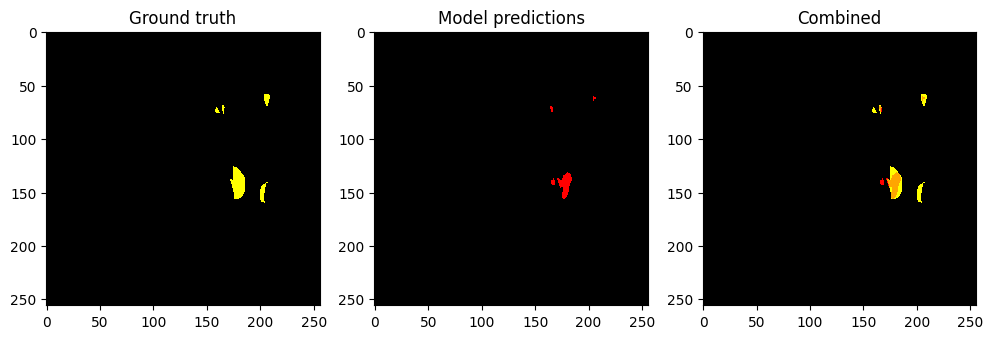

In [ ]:
# Find total ground truths and accurate predictions
sys.setrecursionlimit(recursionLimit)       # Set recursion limit

groundTruth = countDistinctIslands(truthData[dataOrder])
truePositive = countAccurateIslands(truthData[dataOrder], predictedData[dataOrder])

falsePositive = countDistinctIslands(predictedData[dataOrder]) - \
                countAccurateIslands(predictedData[dataOrder], truthData[dataOrder])
falseNegative = groundTruth - truePositive

# Report island count
print(f"[REPORT] (Array #{dataOrder})\n" +
      f"- Ground Truths: {groundTruth}\n" +
      f"- True Positives: {truePositive}\n" +
      f"- False Positives: {falsePositive}\n" +
      f"- False Negatives: {falseNegative}\n" )


# Plot setup
fig = plt.figure(figsize=(12, 24))

gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# Plot Ground truth
cmap = mpc.LinearSegmentedColormap.from_list("", ["black", "yellow"])
ax1.imshow(truthData[dataOrder], cmap=cmap,
           vmin=0, vmax=1, interpolation='nearest')
ax1.set_title("Ground truth")

# Plot Predictions
cmap = mpc.LinearSegmentedColormap.from_list("", ["black", "red"])
ax2.imshow(predictedData[dataOrder], cmap=cmap,
           vmin=0, vmax=1, interpolation='nearest')
ax2.set_title("Model predictions")

# Plot Combined
cmap = mpc.LinearSegmentedColormap.from_list("", ["black", "yellow", "red", "orange"])
ax3.imshow(combinedData[dataOrder], cmap=cmap,
           vmin=0, vmax=3, interpolation='nearest')
ax3.set_title("Combined")

# Show plot
plt.show()

# For loop to display all plots

[REPORT] (Array #0)
Ground Truths: 5 | True Positives: 4 | False Positives: 1 | False Negatives: 1


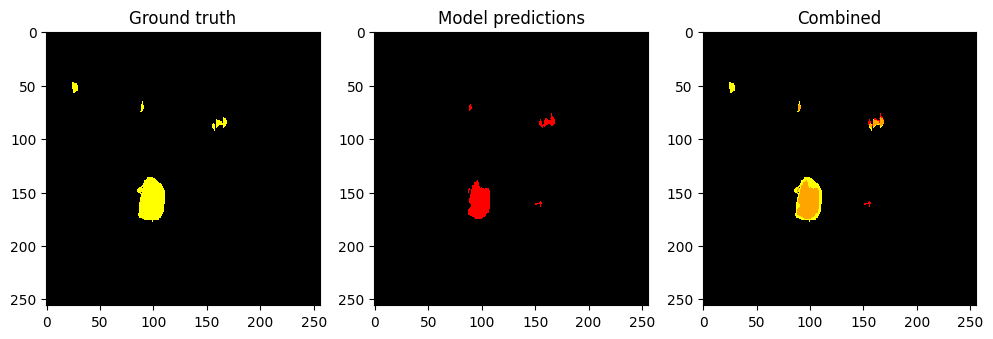

[REPORT] (Array #1)
Ground Truths: 3 | True Positives: 3 | False Positives: 1 | False Negatives: 0


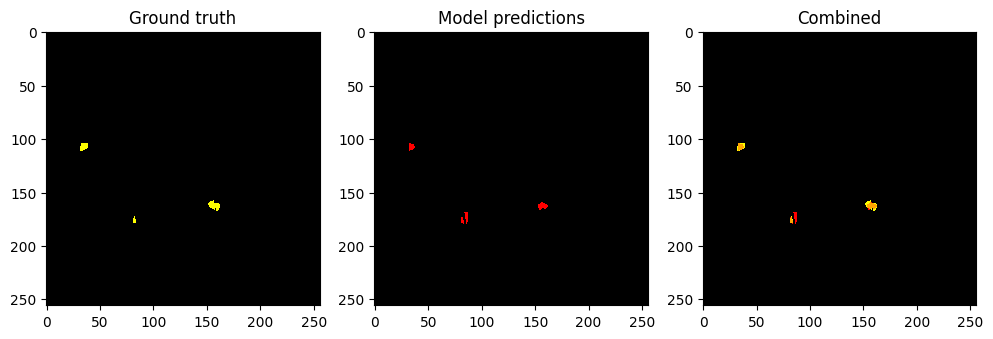

[REPORT] (Array #2)
Ground Truths: 3 | True Positives: 3 | False Positives: 7 | False Negatives: 0


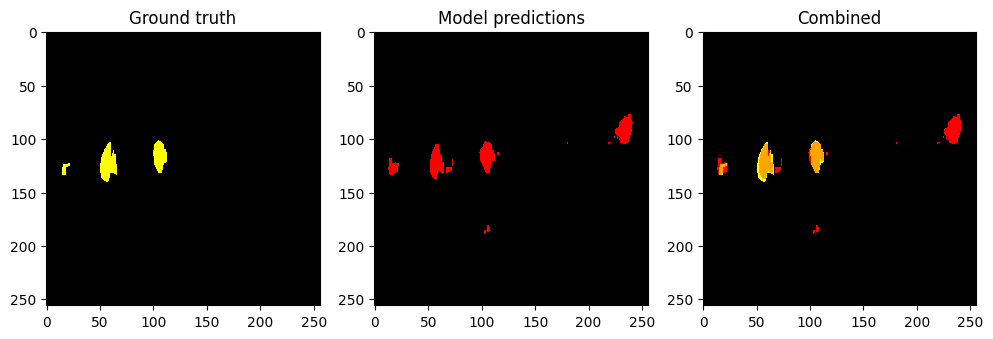

[REPORT] (Array #3)
Ground Truths: 4 | True Positives: 3 | False Positives: 1 | False Negatives: 1


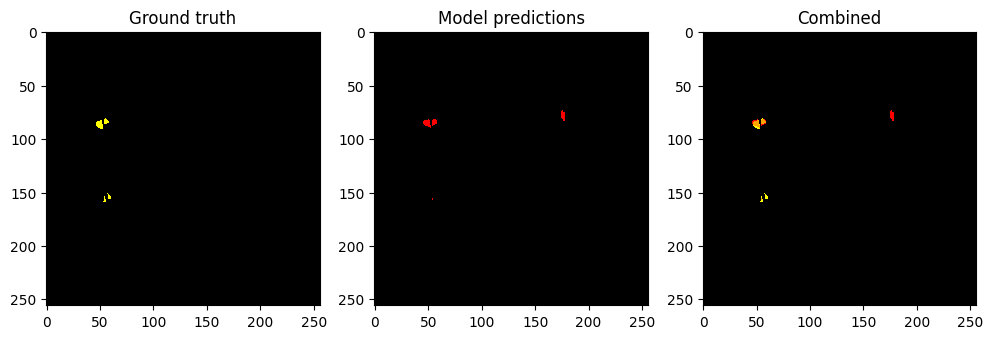

[REPORT] (Array #4)
Ground Truths: 1 | True Positives: 1 | False Positives: 2 | False Negatives: 0


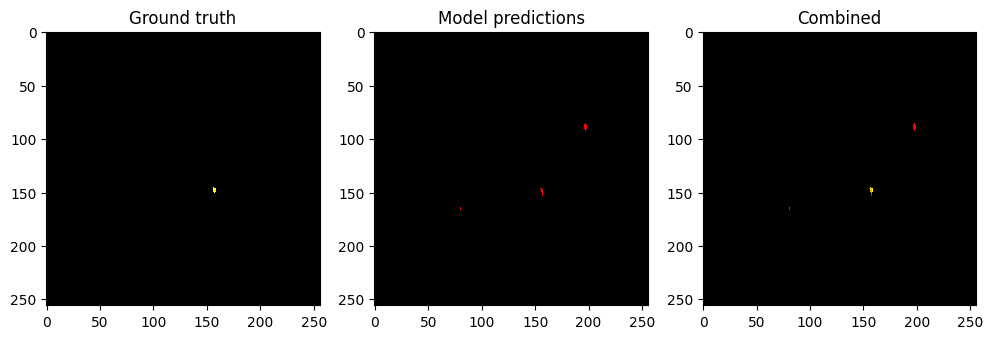

[REPORT] (Array #5)
Ground Truths: 4 | True Positives: 4 | False Positives: 0 | False Negatives: 0


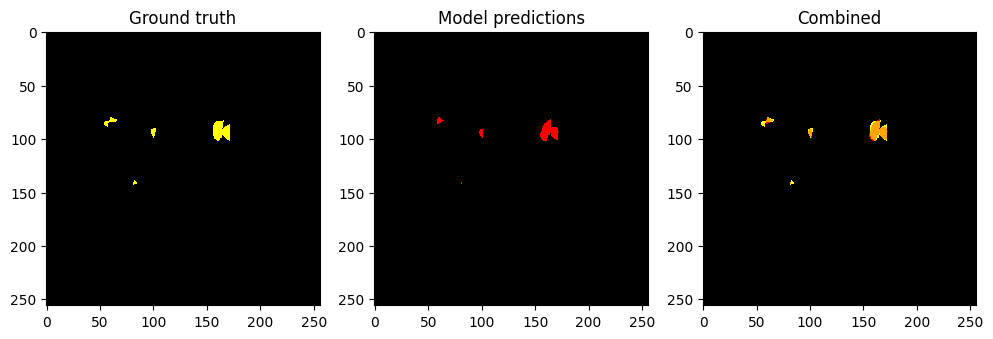

[REPORT] (Array #6)
Ground Truths: 2 | True Positives: 0 | False Positives: 1 | False Negatives: 2


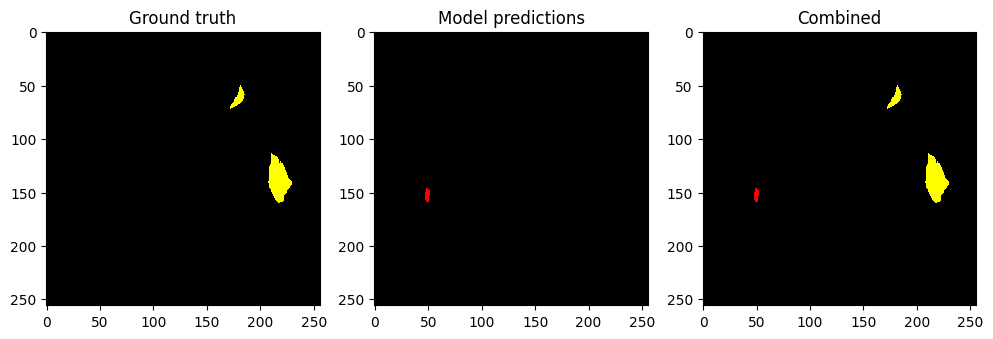

[REPORT] (Array #7)
Ground Truths: 1 | True Positives: 1 | False Positives: 2 | False Negatives: 0


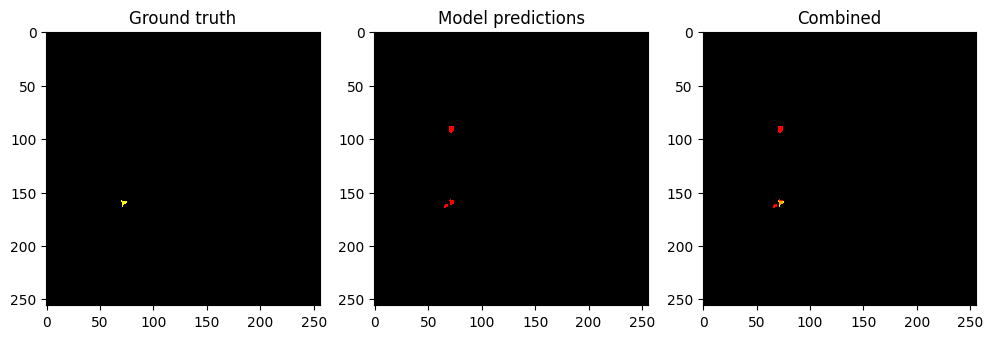

[REPORT] (Array #8)
Ground Truths: 1 | True Positives: 1 | False Positives: 2 | False Negatives: 0


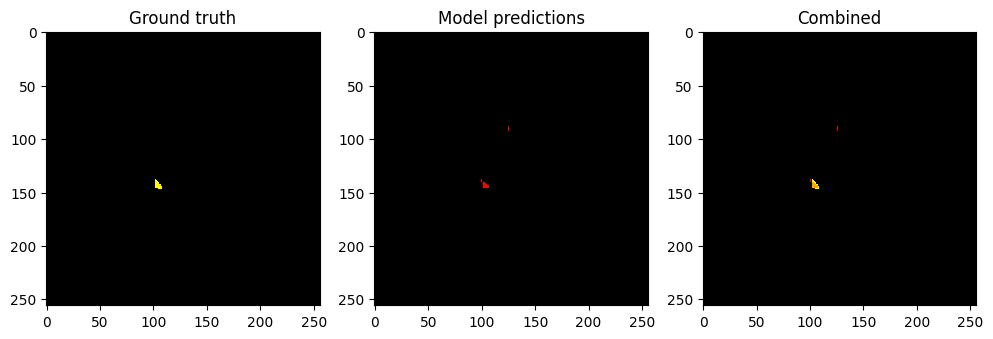

[REPORT] (Array #9)
Ground Truths: 3 | True Positives: 3 | False Positives: 3 | False Negatives: 0


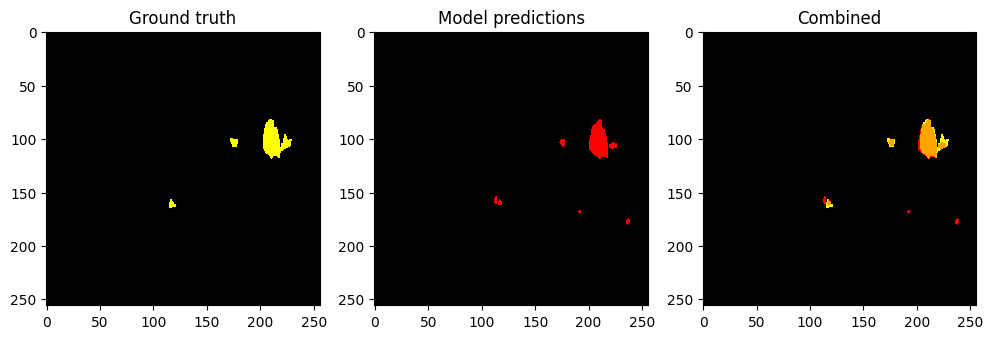

[REPORT] (Array #10)
Ground Truths: 1 | True Positives: 0 | False Positives: 1 | False Negatives: 1


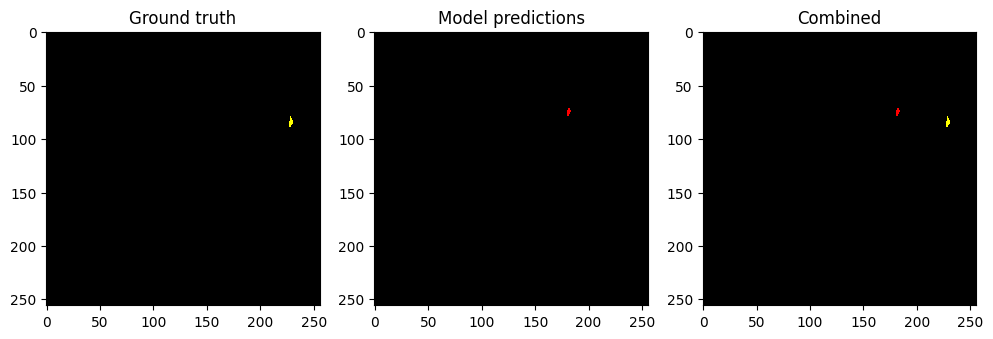

[REPORT] (Array #11)
Ground Truths: 1 | True Positives: 0 | False Positives: 0 | False Negatives: 1


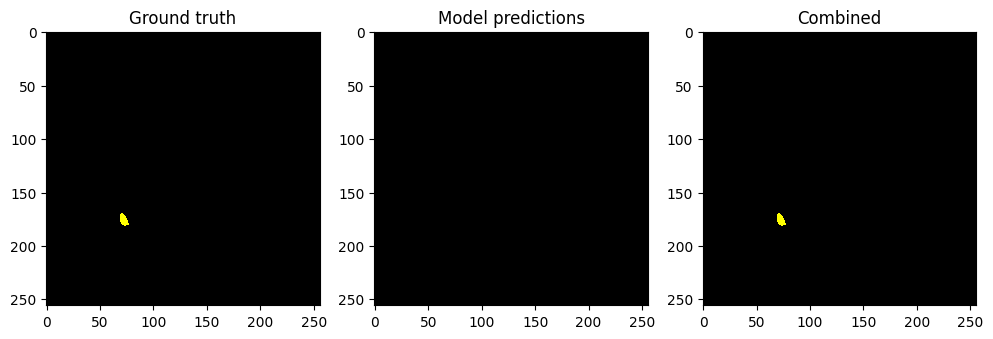

[REPORT] (Array #12)
Ground Truths: 2 | True Positives: 2 | False Positives: 2 | False Negatives: 0


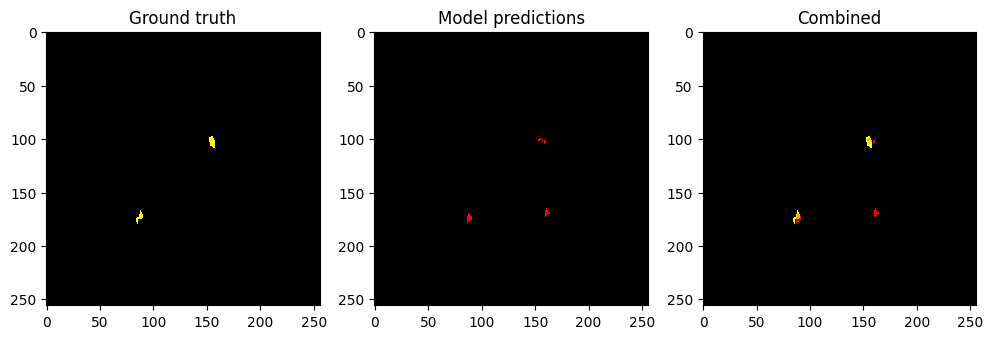

[REPORT] (Array #13)
Ground Truths: 1 | True Positives: 1 | False Positives: 1 | False Negatives: 0


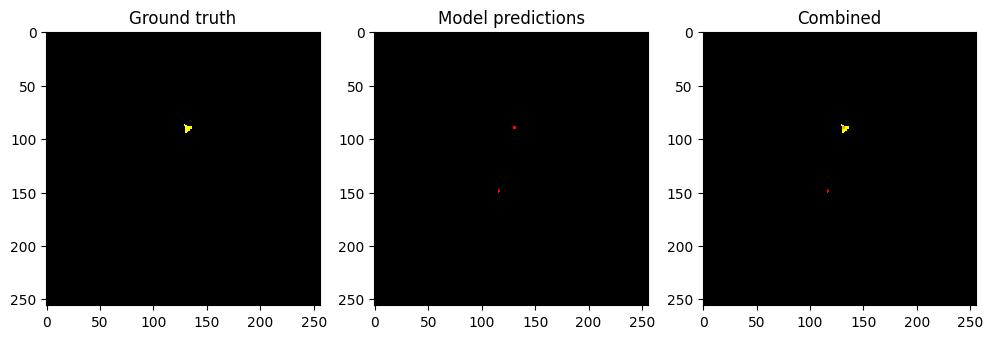

[REPORT] (Array #14)
Ground Truths: 8 | True Positives: 7 | False Positives: 2 | False Negatives: 1


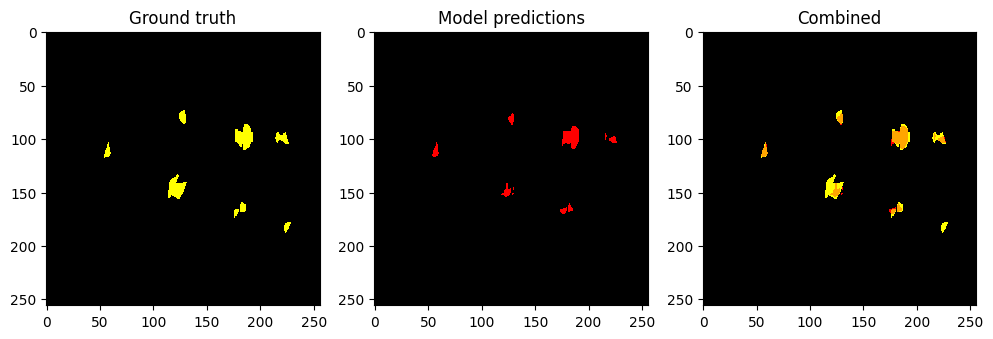

[REPORT] (Array #15)
Ground Truths: 2 | True Positives: 2 | False Positives: 1 | False Negatives: 0


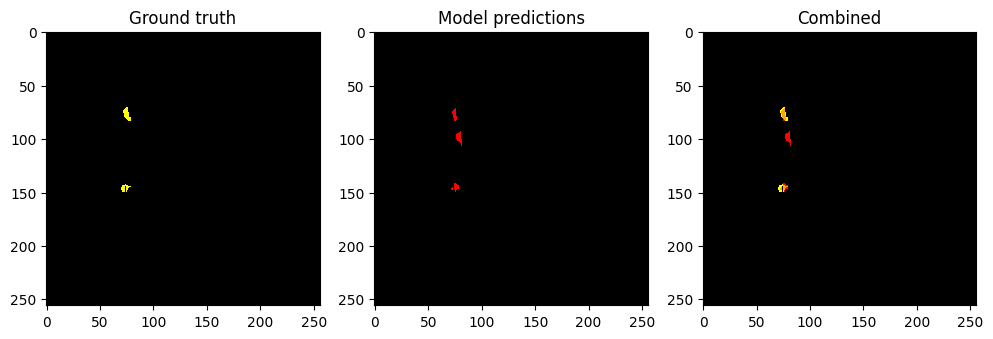

[REPORT] (Array #16)
Ground Truths: 2 | True Positives: 2 | False Positives: 2 | False Negatives: 0


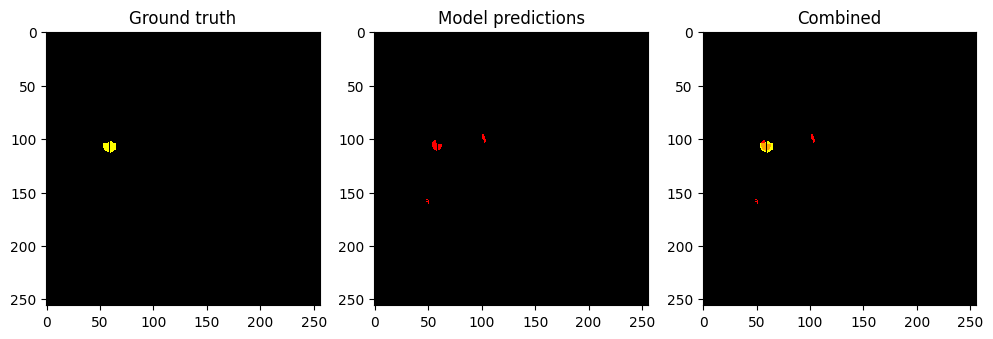

[REPORT] (Array #17)
Ground Truths: 3 | True Positives: 3 | False Positives: 1 | False Negatives: 0


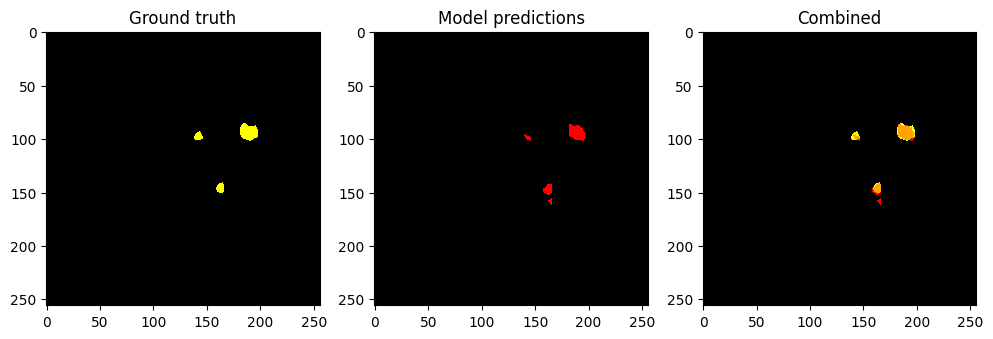

[REPORT] (Array #18)
Ground Truths: 2 | True Positives: 2 | False Positives: 1 | False Negatives: 0


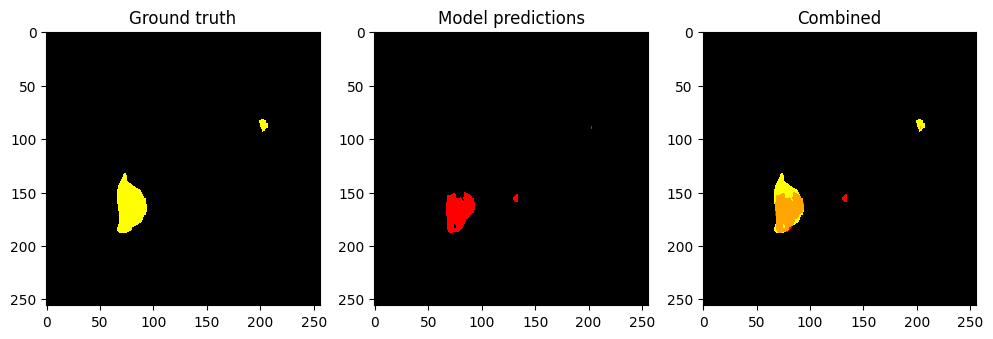

[REPORT] (Array #19)
Ground Truths: 5 | True Positives: 5 | False Positives: 0 | False Negatives: 0


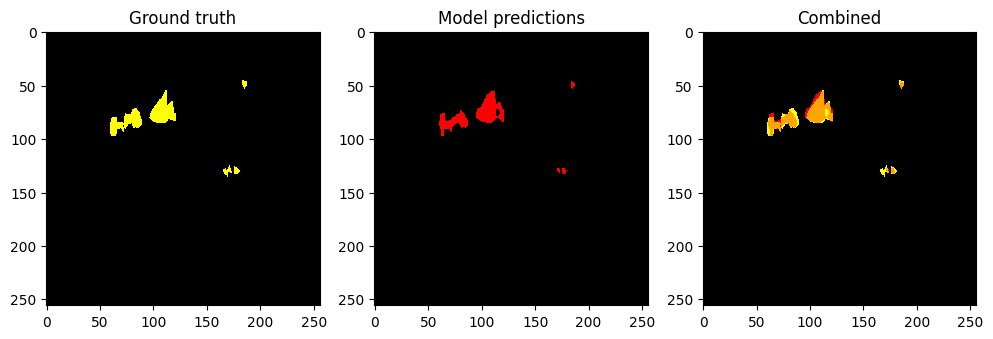

[REPORT] (Array #20)
Ground Truths: 4 | True Positives: 4 | False Positives: 1 | False Negatives: 0


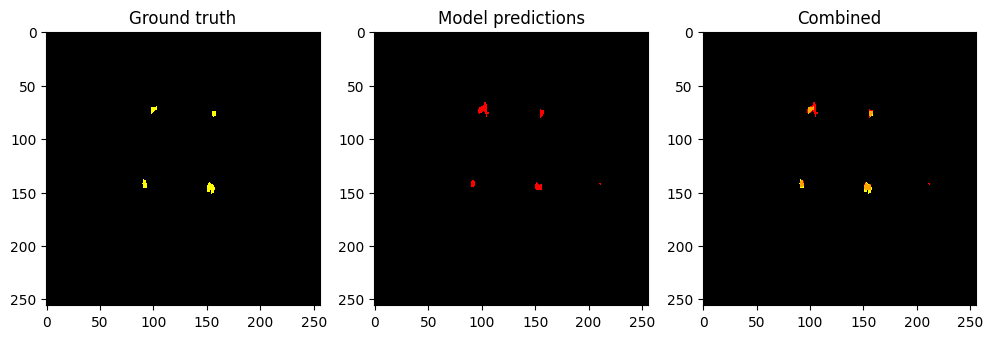

[REPORT] (Array #21)
Ground Truths: 4 | True Positives: 3 | False Positives: 2 | False Negatives: 1


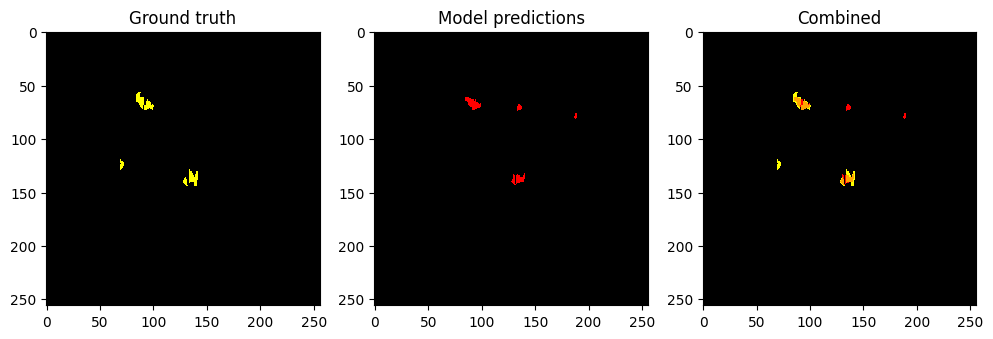

[REPORT] (Array #22)
Ground Truths: 4 | True Positives: 4 | False Positives: 2 | False Negatives: 0


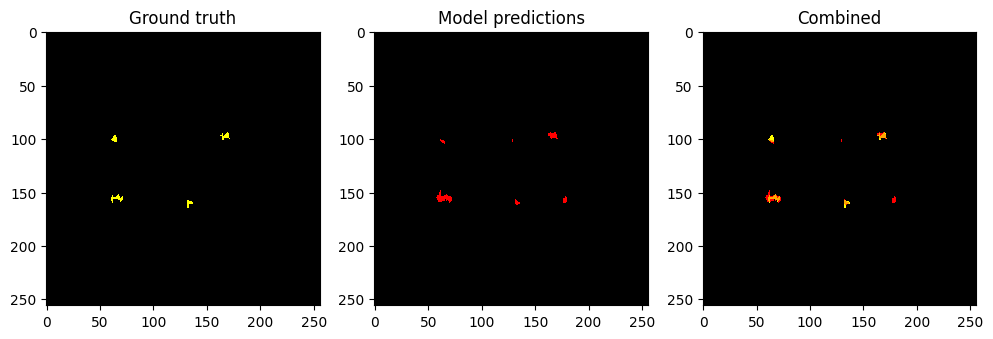

[REPORT] (Array #23)
Ground Truths: 2 | True Positives: 1 | False Positives: 1 | False Negatives: 1


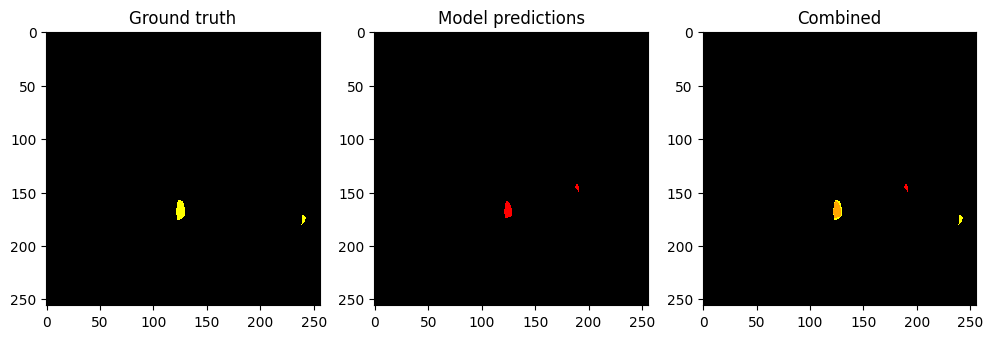

[REPORT] (Array #24)
Ground Truths: 1 | True Positives: 0 | False Positives: 1 | False Negatives: 1


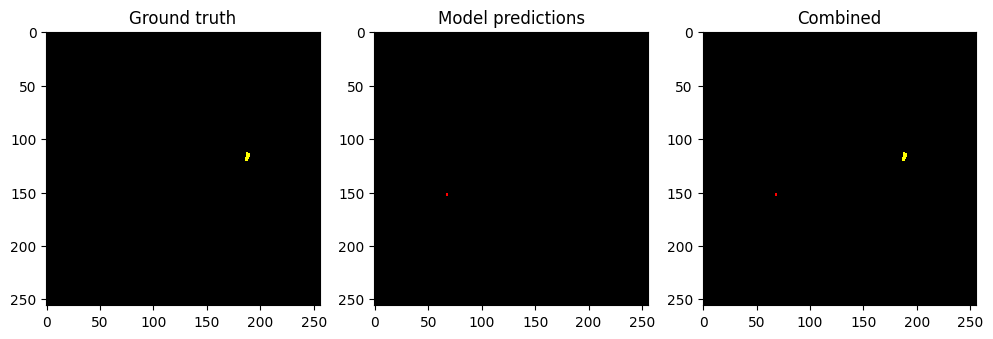

[REPORT] (Array #25)
Ground Truths: 6 | True Positives: 6 | False Positives: 1 | False Negatives: 0


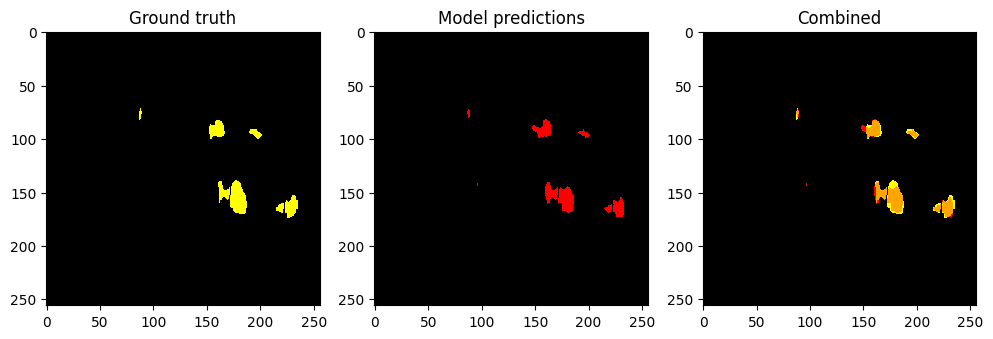

[REPORT] (Array #26)
Ground Truths: 5 | True Positives: 3 | False Positives: 2 | False Negatives: 2


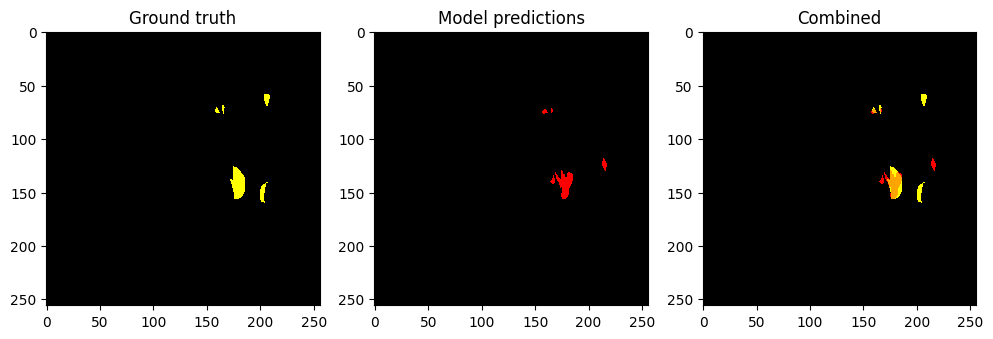

[REPORT] (Array #27)
Ground Truths: 4 | True Positives: 4 | False Positives: 0 | False Negatives: 0


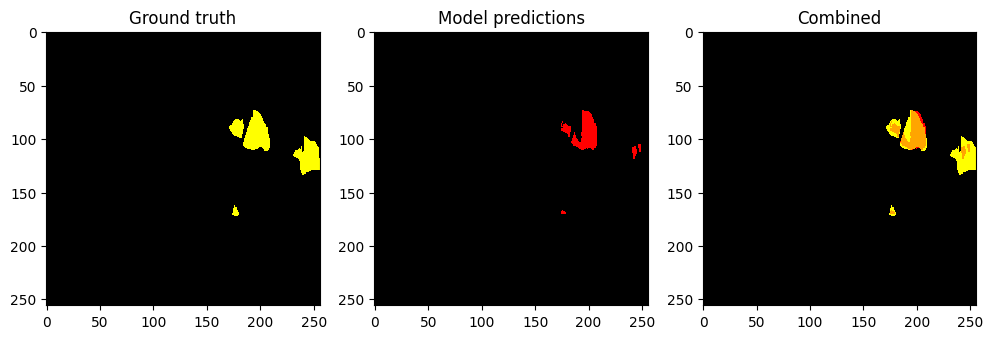

[REPORT] (Array #28)
Ground Truths: 3 | True Positives: 2 | False Positives: 1 | False Negatives: 1


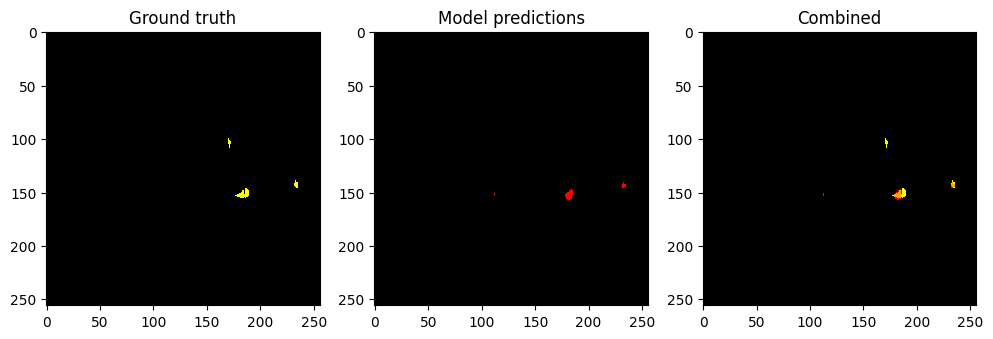

[REPORT] (Array #29)
Ground Truths: 3 | True Positives: 2 | False Positives: 2 | False Negatives: 1


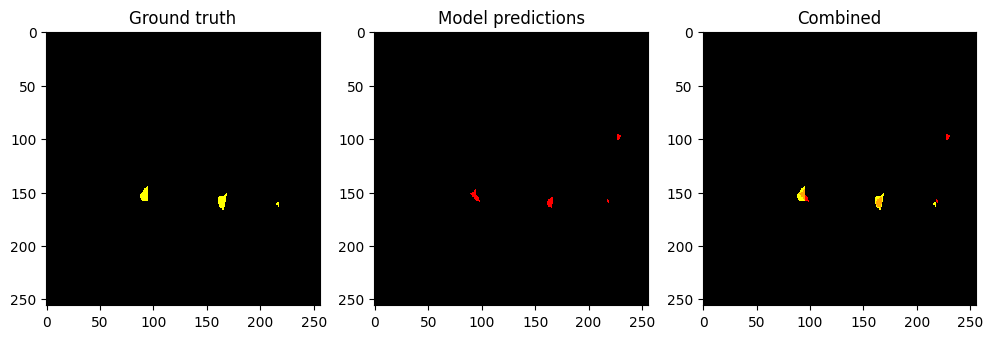

[REPORT] (Array #30)
Ground Truths: 6 | True Positives: 4 | False Positives: 1 | False Negatives: 2


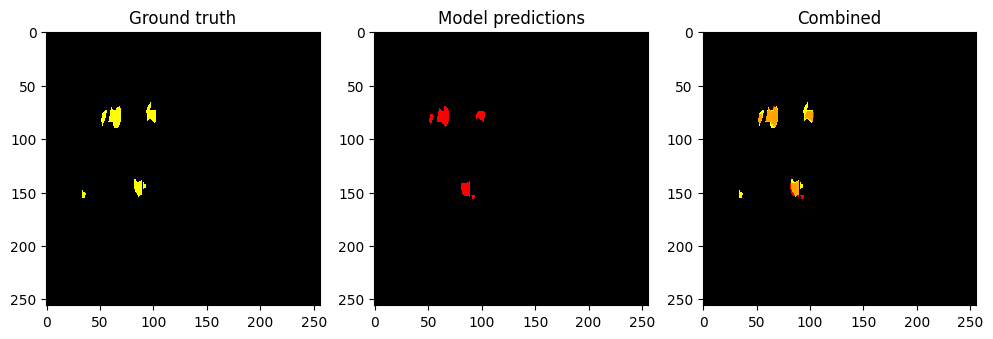

[REPORT] (Array #31)
Ground Truths: 8 | True Positives: 8 | False Positives: 1 | False Negatives: 0


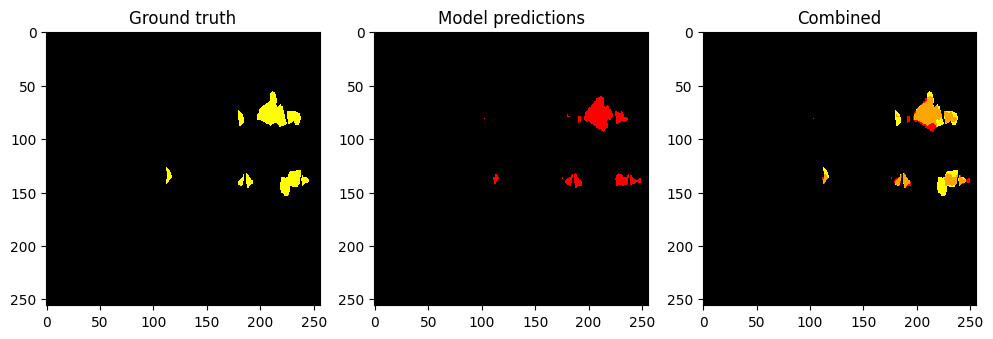

[REPORT] (Array #32)
Ground Truths: 4 | True Positives: 4 | False Positives: 0 | False Negatives: 0


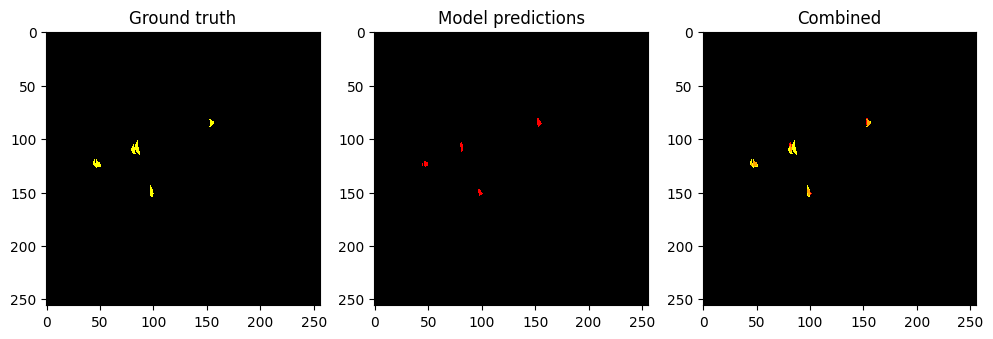

[REPORT] (Array #33)
Ground Truths: 4 | True Positives: 4 | False Positives: 1 | False Negatives: 0


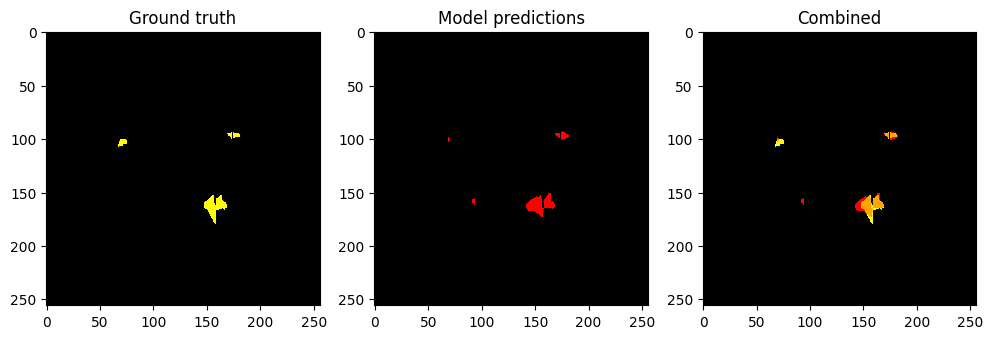

[REPORT] (Array #34)
Ground Truths: 1 | True Positives: 0 | False Positives: 0 | False Negatives: 1


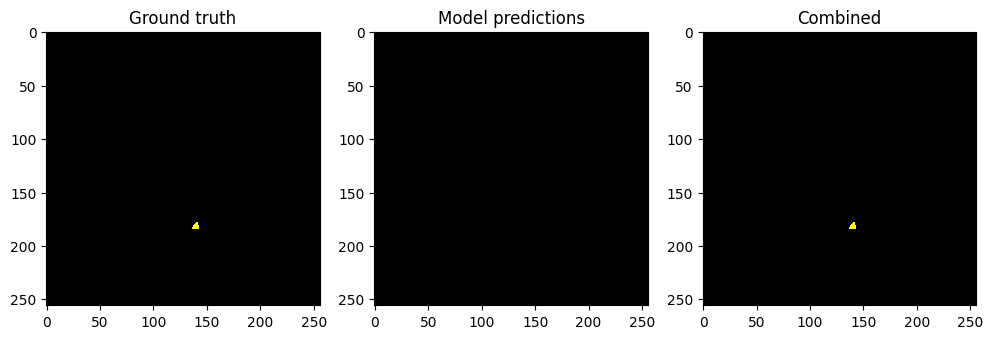

[REPORT] (Array #35)
Ground Truths: 4 | True Positives: 2 | False Positives: 1 | False Negatives: 2


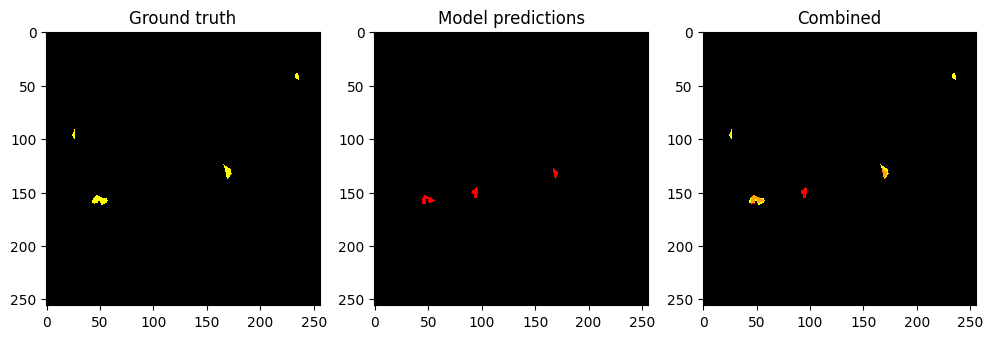

[REPORT] (Array #36)
Ground Truths: 6 | True Positives: 5 | False Positives: 2 | False Negatives: 1


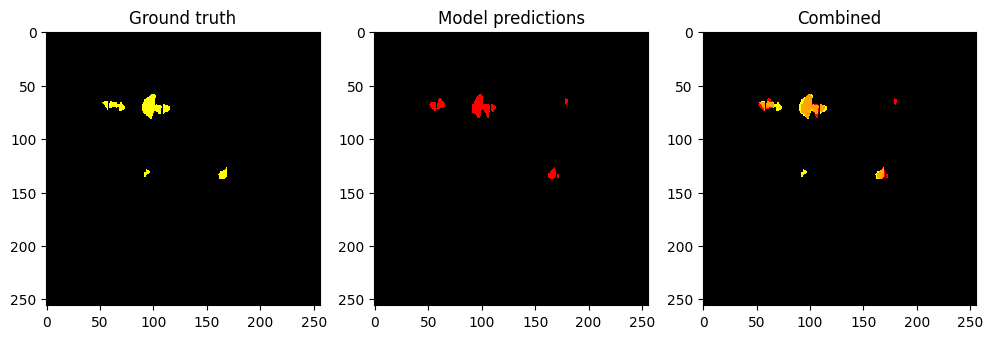

[REPORT] (Array #37)
Ground Truths: 1 | True Positives: 1 | False Positives: 2 | False Negatives: 0


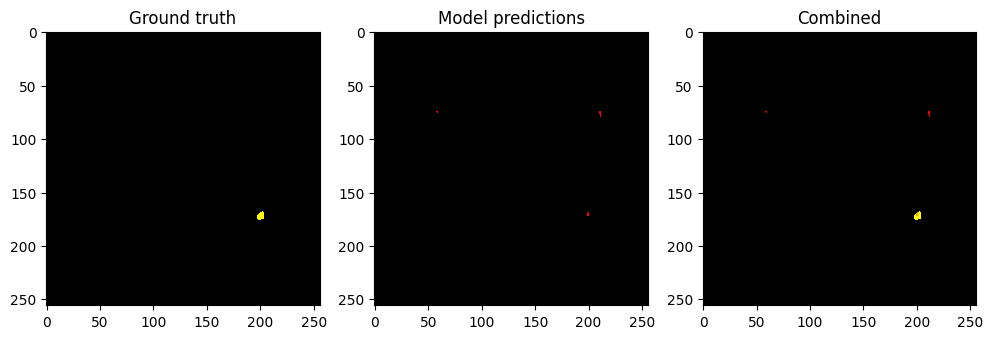

[REPORT] (Array #38)
Ground Truths: 2 | True Positives: 2 | False Positives: 1 | False Negatives: 0


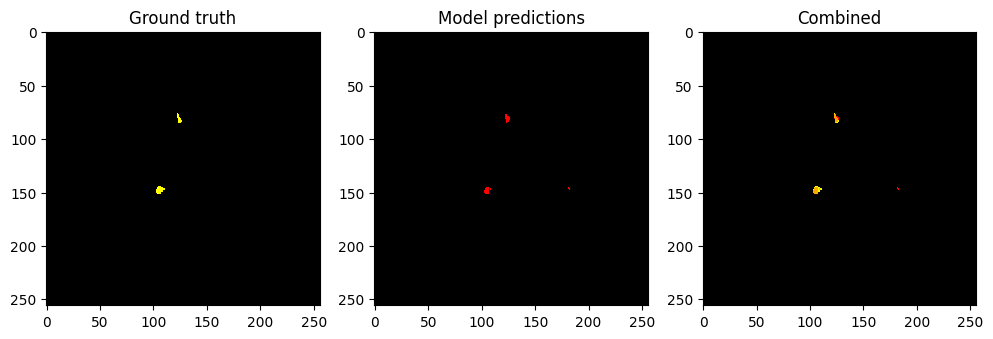

[REPORT] (Array #39)
Ground Truths: 2 | True Positives: 1 | False Positives: 0 | False Negatives: 1


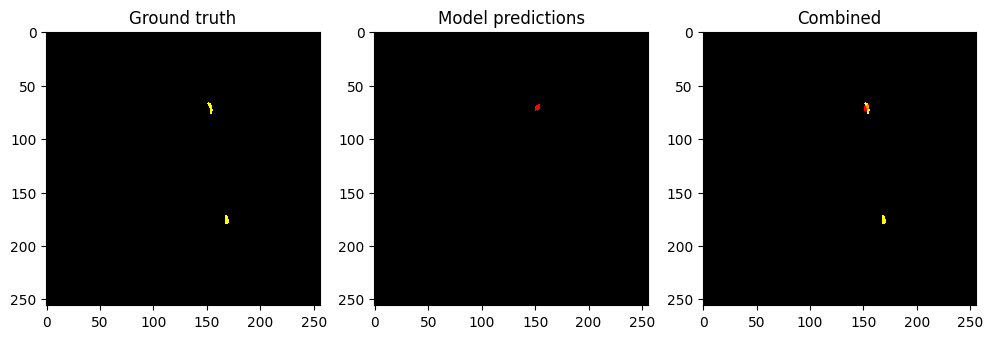

[REPORT] (Array #40)
Ground Truths: 2 | True Positives: 2 | False Positives: 1 | False Negatives: 0


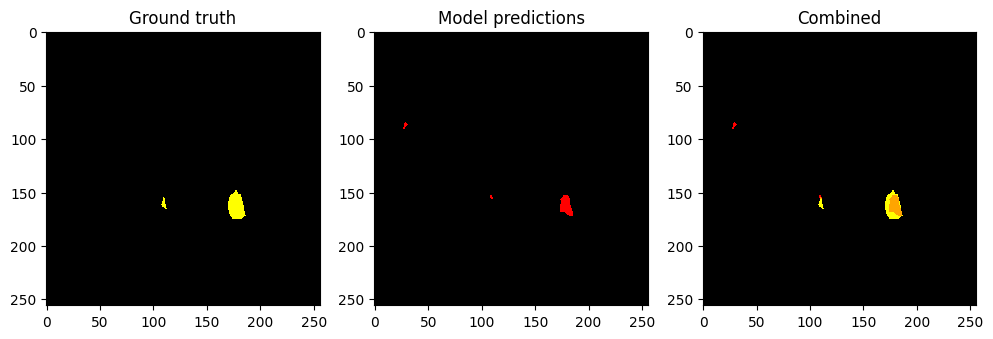

[REPORT] (Array #41)
Ground Truths: 1 | True Positives: 1 | False Positives: 1 | False Negatives: 0


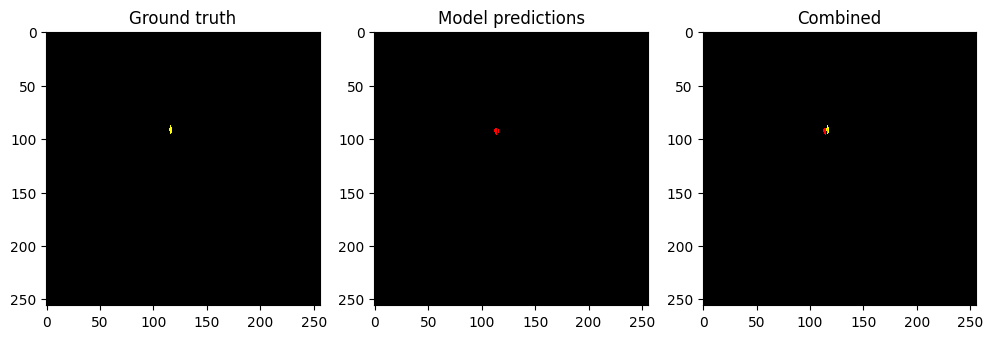

[REPORT] (Array #42)
Ground Truths: 2 | True Positives: 2 | False Positives: 1 | False Negatives: 0


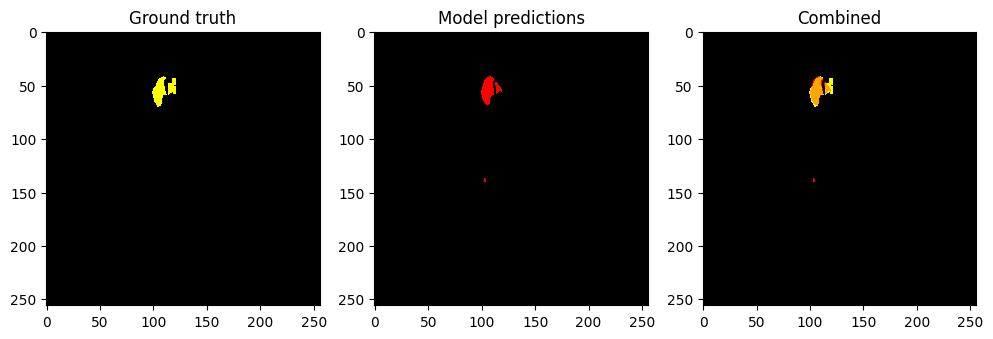

[REPORT] (Array #43)
Ground Truths: 1 | True Positives: 1 | False Positives: 1 | False Negatives: 0


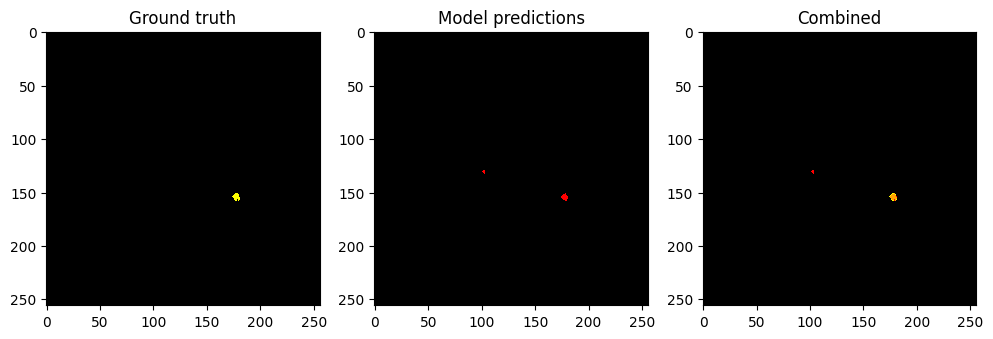

[REPORT] (Array #44)
Ground Truths: 2 | True Positives: 2 | False Positives: 1 | False Negatives: 0


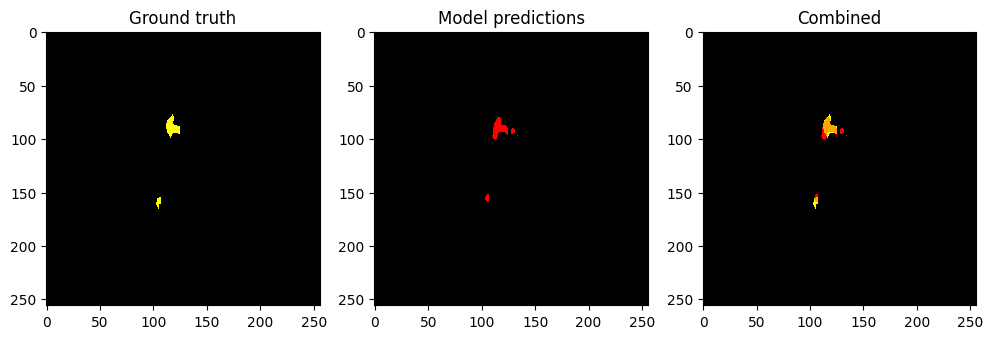

[REPORT] (Array #45)
Ground Truths: 2 | True Positives: 1 | False Positives: 1 | False Negatives: 1


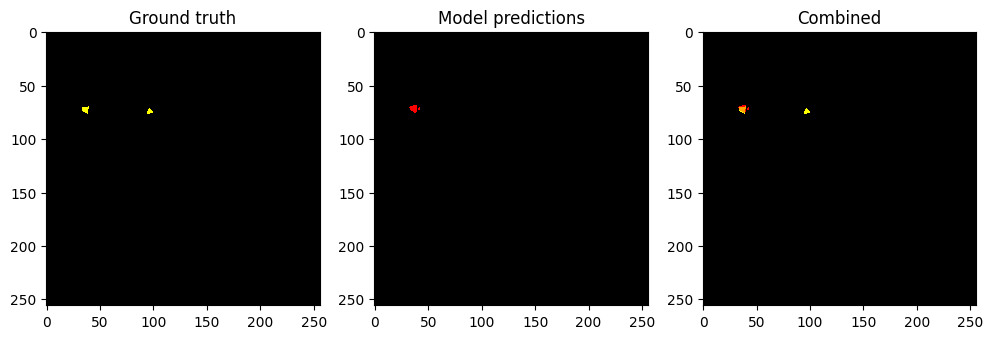

[REPORT] (Array #46)
Ground Truths: 4 | True Positives: 4 | False Positives: 0 | False Negatives: 0


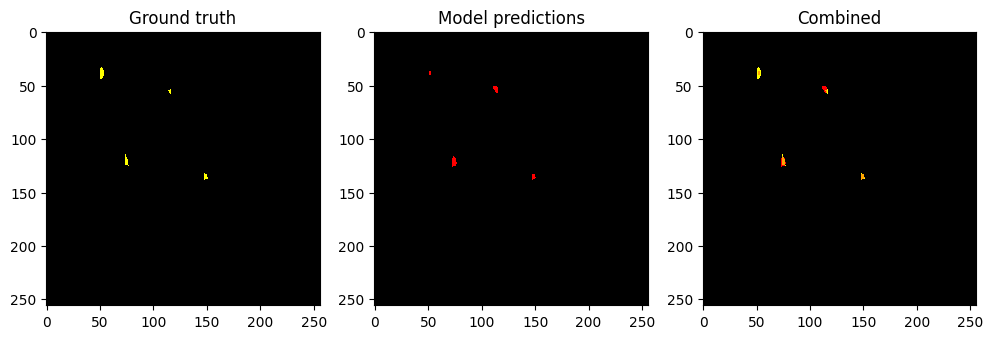

[REPORT] (Array #47)
Ground Truths: 2 | True Positives: 1 | False Positives: 1 | False Negatives: 1


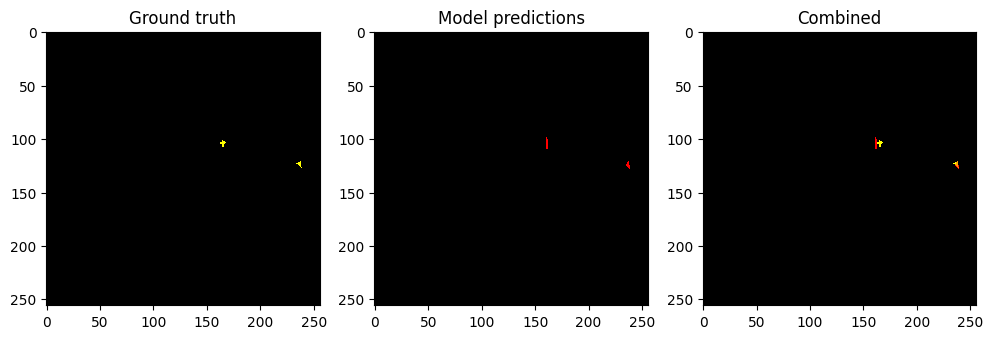

[REPORT] (Array #48)
Ground Truths: 4 | True Positives: 4 | False Positives: 0 | False Negatives: 0


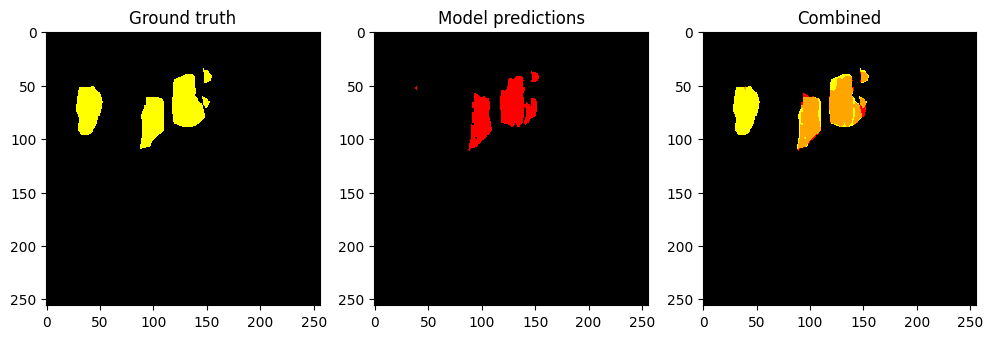

[REPORT] (Array #49)
Ground Truths: 2 | True Positives: 2 | False Positives: 1 | False Negatives: 0


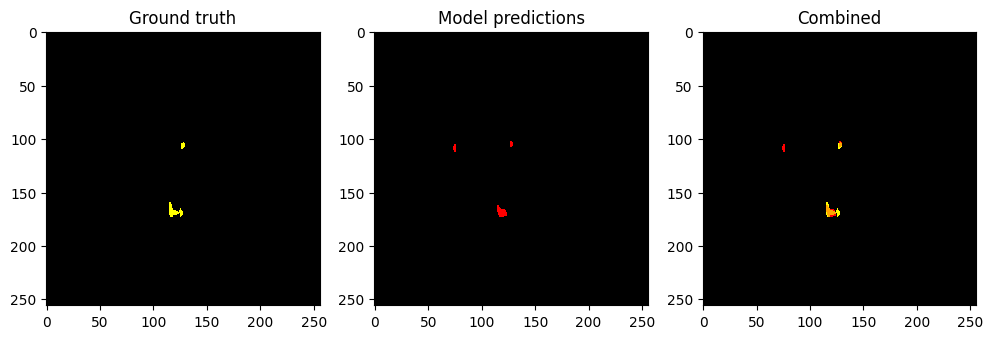

In [ ]:
# Find total ground truths and accurate predictions
sys.setrecursionlimit(5000)                 # Set recursion limit

for i in range(len(truthData)):
  GT = countDistinctIslands(truthData[i])
  TP = countAccurateIslands(truthData[i], predictedData[i])

  FP = countDistinctIslands(predictedData[i]) - \
       countAccurateIslands(predictedData[i], truthData[i])
  FN = GT - TP

  # Report island count
  print(f"[REPORT] (Array #{i})\n" +
        f"Ground Truths: {GT} | " +
        f"True Positives: {TP} | " +
        f"False Positives: {FP} | " +
        f"False Negatives: {FN}")


  # Plot setup
  fig = plt.figure(figsize=(12, 24))

  gs = fig.add_gridspec(1, 3)
  ax1 = fig.add_subplot(gs[0, 0])
  ax2 = fig.add_subplot(gs[0, 1])
  ax3 = fig.add_subplot(gs[0, 2])

  # Plot Ground truth
  cmap = mpc.LinearSegmentedColormap.from_list("", ["black", "yellow"])
  ax1.imshow(truthData[i], cmap=cmap,
            vmin=0, vmax=1, interpolation='nearest')
  ax1.set_title("Ground truth")

  # Plot Predictions
  cmap = mpc.LinearSegmentedColormap.from_list("", ["black", "red"])
  ax2.imshow(predictedData[i], cmap=cmap,
            vmin=0, vmax=1, interpolation='nearest')
  ax2.set_title("Model predictions")

  # Plot Combined
  cmap = mpc.LinearSegmentedColormap.from_list("", ["black", "yellow", "red", "orange"])
  ax3.imshow(combinedData[i], cmap=cmap,
            vmin=0, vmax=3, interpolation='nearest')
  ax3.set_title("Combined")

  # Show plot
  plt.show()

del i, GT, TP, FP, FN

# Confusion matrix

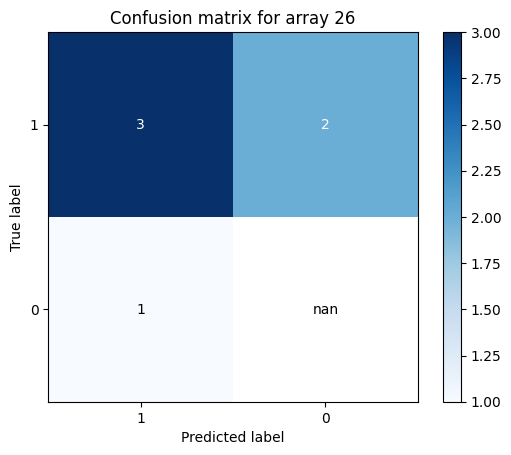

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = np.array([[truePositive,  falseNegative],
               [falsePositive, np.nan      ]])  # Precalculated confusion matrix

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
display.plot(cmap='Blues')

# Set appropriate text color (As NaN breaks default formatting)
# Essentially, let the max value in confusion matrix be MAX
# If the VALUE in confusion matrix >= MAX/2, display white
# Else, display black
# .flatten() is used to avoid nested for loops
for i in range(len(cm.flatten())):
    if cm.flatten()[i] >= np.nanmax(cm) / 2:
      display.text_.flatten()[i].set_color('white')
    else:
      display.text_.flatten()[i].set_color('black')

plt.title(f"Confusion matrix for array {dataOrder}")
plt.show()

# Data compilation

In [ ]:
sys.setrecursionlimit(recursionLimit)     # Set recursion limit

# Create empty list
tempList = []

for MODEL in FILENAMES:
  # Load data
  predictedData_temp = np.load("/content/drive/MyDrive/Python files/Teeth overlay/" + MODEL)
  predictedData_temp = np.around(predictedData_temp, 0)  # Round probabilities

  # Use for-loop to insert all 50 data into dataframe
  for i in range(len(truthData)):
      # Identical variable defintions
      # Names a little different to prevent conflicts with other cells

      GT = countDistinctIslands(truthData[i])
      TP = countAccurateIslands(truthData[i], predictedData_temp[i])

      FP = countDistinctIslands(predictedData_temp[i]) - \
           countAccurateIslands(predictedData_temp[i], truthData[i])

      # Append data rows
      tempList.append([MODEL, i, GT, TP, FP])

# Create and Display the DataFrame
df = pd.DataFrame(tempList, columns=['Filename', 'No.', 'GT', 'TP', 'FP'])
df['FN'] = df.GT - df.TP          # False negative at last column

print(df)

del i, GT, TP, FP, tempList, predictedData_temp

                    Filename  No.  GT  TP  FP  FN
0     1_pr_ogunet_250524.npy    0   5   3   0   2
1     1_pr_ogunet_250524.npy    1   3   1   0   2
2     1_pr_ogunet_250524.npy    2   3   3   1   0
3     1_pr_ogunet_250524.npy    3   4   3   1   1
4     1_pr_ogunet_250524.npy    4   1   0   0   1
..                       ...  ...  ..  ..  ..  ..
695  pr_effb5_350_300524.npy   45   2   1   1   1
696  pr_effb5_350_300524.npy   46   4   3   0   1
697  pr_effb5_350_300524.npy   47   2   1   0   1
698  pr_effb5_350_300524.npy   48   4   4   0   0
699  pr_effb5_350_300524.npy   49   2   1   1   1

[700 rows x 6 columns]


Use dataframe above to construct further metrics

In [ ]:
metrics = df.copy()

metrics['Precision'] = metrics.TP / (metrics.TP + metrics.FP)
metrics['Recall'] = metrics.TP / (metrics.TP + metrics.FN)

# print(f'Mean precision: {metrics.Precision.mean().round(2)}')
# print(f'Mean recall: {metrics.Recall.mean().round(2)}')

print(metrics)

                    Filename  No.  GT  TP  FP  FN  Precision    Recall
0     1_pr_ogunet_250524.npy    0   5   3   0   2       1.00  0.600000
1     1_pr_ogunet_250524.npy    1   3   1   0   2       1.00  0.333333
2     1_pr_ogunet_250524.npy    2   3   3   1   0       0.75  1.000000
3     1_pr_ogunet_250524.npy    3   4   3   1   1       0.75  0.750000
4     1_pr_ogunet_250524.npy    4   1   0   0   1        NaN  0.000000
..                       ...  ...  ..  ..  ..  ..        ...       ...
695  pr_effb5_350_300524.npy   45   2   1   1   1       0.50  0.500000
696  pr_effb5_350_300524.npy   46   4   3   0   1       1.00  0.750000
697  pr_effb5_350_300524.npy   47   2   1   0   1       1.00  0.500000
698  pr_effb5_350_300524.npy   48   4   4   0   0       1.00  1.000000
699  pr_effb5_350_300524.npy   49   2   1   1   1       0.50  0.500000

[700 rows x 8 columns]


Save result as csv

In [ ]:
metrics.to_csv("finalModelData.csv")

NameError: name 'metrics' is not defined